In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sympy import Matrix, init_printing
random.seed(40)

# Problem 1

In [2]:
class MLP:
    def __init__(self,X_train,Y_train,hidden_nodes = 2):
        
        
        self.X = X_train
        self.Y = Y_train

        din,n = self.X.shape
        


        
        self.m = hidden_nodes
        
        #### H -> hidden nodes output
        #### W_h -> weights between input and hidden layer
        #### W_o -> weights between hidden and output layer
        
        self.H = np.ones((self.m +1,n))## initialising random weights
        self.W_h = np.random.random((din,self.H.shape[0]))
        self.W_o = np.random.random((self.H.shape[0],self.Y.shape[0]))

        

    def forward_pass(self,X):
        H = self.H
        W_h = self.W_h
        W_o = self.W_o

        def sigmoid (w,x) :
            act = np.transpose(w)@x
            return 1/(1+np.exp(-1*act))
        
        ######################################
    
        H = sigmoid(W_h,X)
        #H[:,0] = np.ones(H[:,0].shape)
        H[0,:] = np.ones(H[0,:].shape)
        Y_pred = sigmoid(W_o,H) 
        
        return H,Y_pred
        
        
    def back_prop(self,X,Y):
        
        H = self.H
        Y_pred = self.Y_pred
        W_o = self.W_o
        W_h = self.W_h
        
        def loss(y,y_hat):
            return (-1*(y - y_hat))

        def sig_loss(y_hat):
            return np.multiply((1 - y_hat) , (y_hat))
        
        ########################################
        
        #### Back prop : 
        W_o_grad = W_o.copy()
        W_h_grad = W_h.copy()
        W_o_new = W_o.copy()
        W_h_new = W_h.copy()
        lr = self.lr
        
        
        #### updating output weigths

        for i in range(W_o_grad.shape[0]):
            for j in range(W_o_grad.shape[1]):

                W_o_grad[i][j] = np.mean( loss(Y[j],Y_pred[j]) * sig_loss(Y_pred[j]) * H[i] )

                W_o_new[i][j] = W_o[i][j] - (lr* W_o_grad[i][j] ) 
        

        #### Updating input weights 
        
        k = 0   #### TODO for multi dim op
        for i in range(W_h_grad.shape[0]):
            for j in range(W_h_grad.shape[1]):
                W_h_grad[i][j] = np.mean( loss(Y[k],Y_pred[k]) * sig_loss(Y_pred[k]) * W_o[j][k] * sig_loss(H[j]) * X[i] )
                W_h_new[i][j] = W_h[i][j] - ( lr*W_h_grad[i][j] )
        
        
        return W_h_new, W_o_new
    
    
    def run_epochs(self,X,Y,epochs,lr,plot = False):
        self.lr = lr
        
        error = np.zeros(epochs)
        
        for e in range(epochs):
            self.H, self.Y_pred, = self.forward_pass(X)
            
            error[e] =  np.mean((Y - self.Y_pred**2))
            
            self.W_h, self.W_o = self.back_prop(X,Y)
            
        if(plot ==True):
            n= np.arange(error.size)
            plt.xlabel('Epochs')
            plt.ylabel('Squared loss')
            plt.plot(n,error)
            plt.figure()
            
            
    
    def test_model(self,X_test):
        din,n = X_test.shape
        H = np.ones((self.m +1,n))
        W_h = self.W_h
        W_o = self.W_o
        

        
        def sigmoid (w,x) :
            act = np.transpose(w)@x
            return 1/(1+np.exp(-1*act))
        
        ######################################
    
        H = sigmoid(W_h,X_test)
        H[:,0] = np.ones(H[:,0].shape)
        Y_pred = sigmoid(W_o,H) 
        
        return Y_pred
    


        

In [3]:
####  Creating a dataset



def create_XOR_data(data_size,var):
    
    A = np.random.binomial(size = data_size, n=1, p= 0.5)
    B = np.random.binomial(size = data_size, n=1, p= 0.5)
    X = np.array((A,B))
    Y = np.logical_xor(X[0],X[1]) + 0
    
    
    color = ['black'*(1-i) + 'cyan'*(i) for i in (Y) ]
    
    X_noise= X + np.random.normal(0, var, X.shape)
    Y_final = Y.reshape((1,Y.shape[0]))
    
    ### plotting : 
    plt.scatter(X_noise[0],X_noise[1],color = color)
    plt.figure()
    
    return X_noise,Y_final



def create_AND_data(data_size,var):
    
    A = np.random.binomial(size = data_size, n=1, p= 0.5)
    B = np.random.binomial(size = data_size, n=1, p= 0.5)
    X = np.array((A,B))
    Y = np.logical_and(X[0],X[1]) + 0
    
    
    color = ['black'*(1-i) + 'cyan'*(i) for i in (Y) ]
    
    X_noise= X + np.random.normal(0, var, X.shape)
    Y_final = Y.reshape((1,Y.shape[0]))
    
    ### plotting : 
    plt.scatter(X_noise[0],X_noise[1],color = color)
    plt.figure()
    
    return X_noise,Y_final


def create_OR_data(data_size,var):
    
    A = np.random.binomial(size = data_size, n=1, p= 0.5)
    B = np.random.binomial(size = data_size, n=1, p= 0.5)
    X = np.array((A,B))
    Y = np.logical_or(X[0],X[1]) + 0
    
    
    color = ['black'*(1-i) + 'cyan'*(i) for i in (Y) ]
    
    X_noise= X + np.random.normal(0, var, X.shape)
    Y_final = Y.reshape((1,Y.shape[0]))
    
    ### plotting : 
    plt.scatter(X_noise[0],X_noise[1],color = color)
    plt.figure()
    
    return X_noise,Y_final

### Problem 1.1 : XOR operation

Inputs : A 


Matrix([[0, 0, 1, 1]])

Inputs : B 


Matrix([[0, 1, 0, 1]])

Truth Value :  A xor B


Matrix([[0, 1, 1, 0]])

Predictions


Matrix([[0.72, 0.98, 0.99, 0.96]])

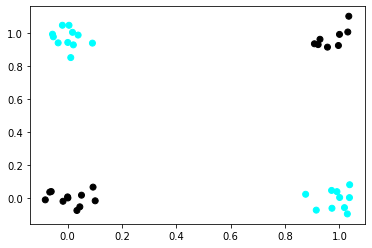

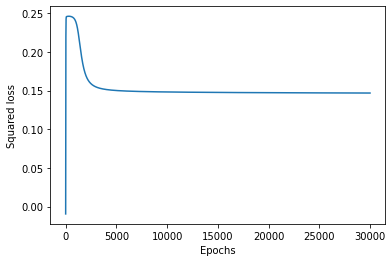

<Figure size 432x288 with 0 Axes>

In [4]:
############## For XOR operation

### Training...
np.random.seed(100)  ### fixing the random state value for checking..
X_trn,Y_trn = create_XOR_data(data_size = 40,var = 0.05)
Model = MLP(X_trn,Y_trn,hidden_nodes = 2)
Model.run_epochs(X_trn,Y_trn,30000,1,plot = True)



### Testing...
X_test = np.transpose(np.array([[0,0],[0,1],[1,0],[1,1]]) )
Y_test = np.transpose(np.array([[0],[1],[1],[0]])) 
preds = Model.test_model(X_test)

print("Inputs : A ")
display(Matrix(X_test[[0]]) )
print("Inputs : B ")
display(Matrix(X_test[[1]]) )
print("Truth Value :  A xor B")
display(Matrix(Y_test) )
print("Predictions")
display(Matrix(np.round(preds,decimals = 2)) )


In [17]:
print(X_trn.shape)

print(Y_trn.shape)


Model.H[0,:]

(2, 40)
(1, 40)


array([1.        , 0.98441002, 0.97779648, 0.98076775, 0.4072476 ,
       0.98349809, 0.99978876, 0.98322609, 0.56735058, 0.99961696,
       0.99953236, 0.98883689, 0.46055974, 0.98193758, 0.5790128 ,
       0.97165963, 0.98807585, 0.47401236, 0.97355016, 0.98440454,
       0.44943951, 0.99986323, 0.99954696, 0.48414483, 0.9889208 ,
       0.9846541 , 0.99025254, 0.50032178, 0.98209651, 0.48290686,
       0.96297432, 0.97661579, 0.65759273, 0.98929642, 0.98882898,
       0.99974629, 0.99965344, 0.50611552, 0.98286791, 0.9714855 ])

### Problem 1.2 : AND operation

Inputs : A 


Matrix([[0, 0, 1, 1]])

Inputs : B 


Matrix([[0, 1, 0, 1]])

Truth Value :  A and B


Matrix([[0, 0, 0, 1]])

Predictions


Matrix([[0.0, 0.0, 0.0, 0.95]])

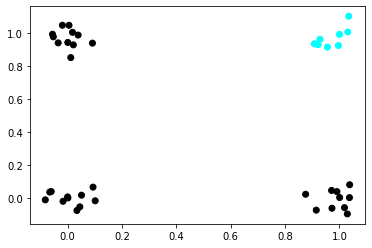

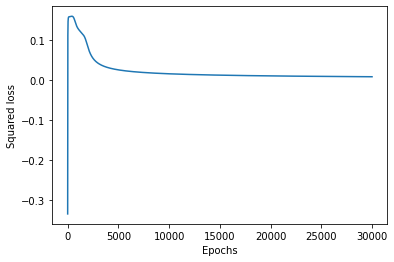

<Figure size 432x288 with 0 Axes>

In [23]:
############## For AND operation

### Training...
np.random.seed(100)  ### fixing the random state value for checking..
X_trn,Y_trn = create_AND_data(data_size = 40,var = 0.05)
Model = MLP(X_trn,Y_trn,hidden_nodes = 2)  ### hidden nodes no.
Model.run_epochs(X_trn,Y_trn,30000,1,plot = True)



### Testing...
X_test = np.transpose(np.array([[0,0],[0,1],[1,0],[1,1]]) )
Y_test = np.transpose(np.array([[0],[0],[0],[1]] )) 
preds = Model.test_model(X_test)

print("Inputs : A ")
display(Matrix(X_test[[0]]) )
print("Inputs : B ")
display(Matrix(X_test[[1]]) )
print("Truth Value :  A and B")
display(Matrix(Y_test) )
print("Predictions")
display(Matrix(np.round(preds,decimals = 2)) )



### 1.3 OR operation

Inputs : A 


Matrix([[0, 0, 1, 1]])

Inputs : B 


Matrix([[0, 1, 0, 1]])

Truth Value :  A xor B


Matrix([[0, 1, 1, 1]])

Predictions


Matrix([[0.99, 1.0, 1.0, 1.0]])

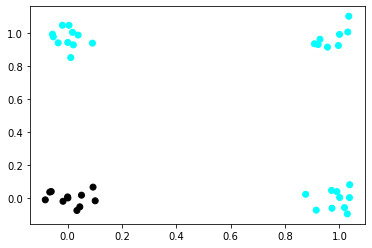

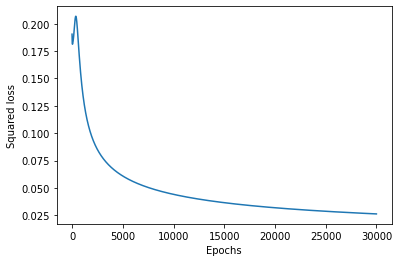

<Figure size 432x288 with 0 Axes>

In [22]:
############## For OR operation

### Training...
np.random.seed(100)  ### fixing the random state value for checking..
X_trn,Y_trn = create_OR_data(data_size = 40,var = 0.05)
Model = MLP(X_trn,Y_trn,hidden_nodes = 2)  ### hidden nodes no.
Model.run_epochs(X_trn,Y_trn,30000,1,plot = True)



### Testing...
X_test = np.transpose(np.array([[0,0],[0,1],[1,0],[1,1]]) )
Y_test = np.transpose(np.array([[0],[1],[1],[1]] )) 
preds = Model.test_model(X_test)

print("Inputs : A ")
display(Matrix(X_test[[0]]) )
print("Inputs : B ")
display(Matrix(X_test[[1]]) )
print("Truth Value :  A xor B")
display(Matrix(Y_test) )
print("Predictions")
display(Matrix(np.round(preds,decimals = 2)) )
